In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

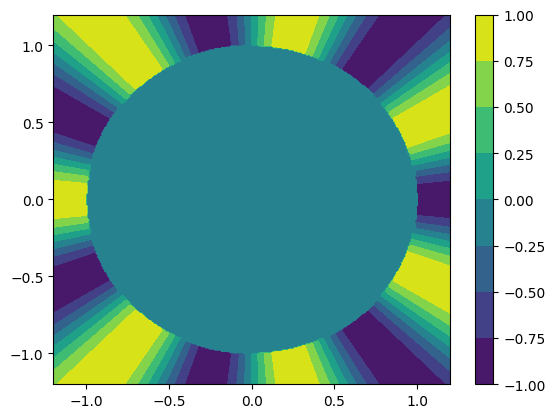

In [ ]:
N=300
X=np.linspace(-1.2,1.2,N)
Y=np.linspace(-1.2,1.2,N)
matrix=np.zeros((N,N))
h=X[1]-X[0]
func=lambda x,y: np.sin(7*np.arctan2(y,x))
for i in range(N):
    for j in range(N):
      if np.linalg.norm([X[i],Y[j]])>1:
        matrix[i,j]=func(X[i],Y[j])


p=plt.contourf(X,Y,matrix)
plt.colorbar(p)

In [ ]:


from tqdm.notebook import tqdm

def advance(iters):
  for iter in tqdm(range(iters)):
    matrix2=matrix.copy()

    for i in range(1,N-1):
      for j in range(1,N-1):
        if np.linalg.norm([X[i],Y[j]])<1:
          matrix[i,j]=0.25*(matrix[i+1,j]+matrix[i-1,j]+matrix[i,j+1]+matrix[i,j-1])-h**2*np.pi*(X[i]+Y[j])

    mat=np.abs(matrix-matrix2)
    dif=np.trace(mat)
    if dif < 10E-4:
      print(dif)
      break
advance(200)

  0%|          | 0/200 [00:00<?, ?it/s]

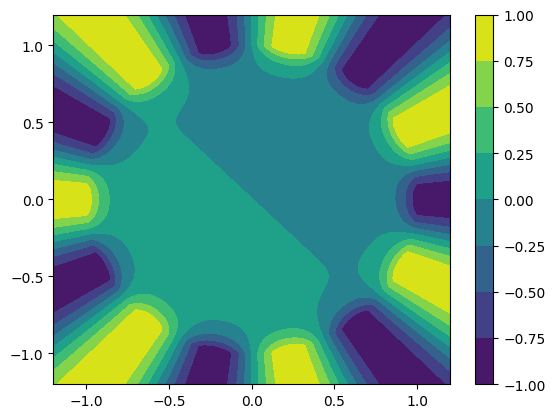

In [ ]:
p=plt.contourf(X,Y,matrix)
plt.colorbar(p)

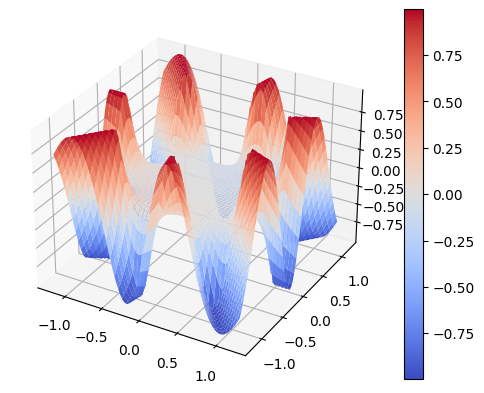

In [ ]:
X1,Y1=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.add_subplot(projection="3d")
superficie=ax.plot_surface(X1,Y1,matrix,cmap="coolwarm")
fig.colorbar(superficie)